<a href="https://colab.research.google.com/github/Finyasy/Fashion_MNIST/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets,transforms
import helper

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

import importlib
importlib.reload(helper)

--2021-09-26 12:01:29--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



<module 'helper' from '/content/helper.py'>

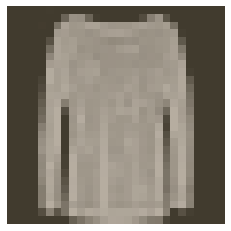

In [ ]:
image,label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [ ]:
from torch import nn,optim
import torch.nn.functional as F

In [ ]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5150860293524098
Training loss: 0.3941988998066896
Training loss: 0.35611841856225973
Training loss: 0.3333460743398046
Training loss: 0.3170024023444922


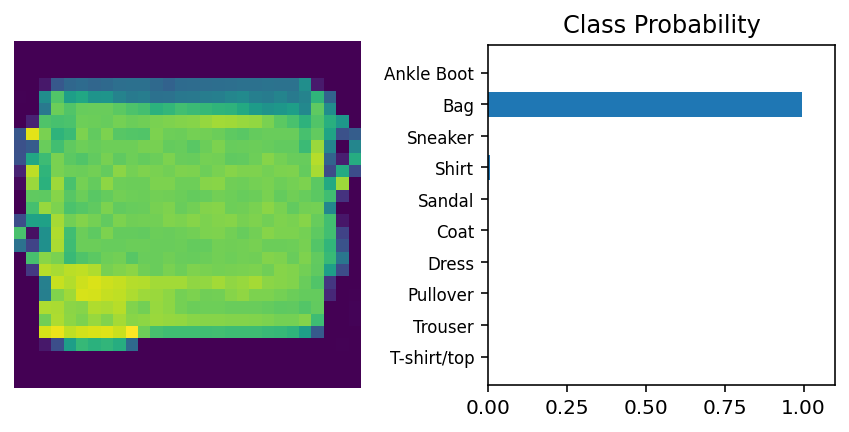

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images,labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))

helper.view_classify(img,ps,version='Fashion')

In [ ]:
print(ps.shape)

torch.Size([1, 10])


In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [ ]:
top_p,top_class = ps.topk(1,dim=1)
#most likely class
print(top_class[:10,:])

tensor([[6],
        [7],
        [4],
        [7],
        [7],
        [6],
        [7],
        [7],
        [7],
        [6]])


In [ ]:
equals = top_class == labels
equals

tensor([[False, False, False,  ..., False,  True, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False,  True, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False,  True, False]])

In [ ]:
equals = top_class == labels.view(*top_class.shape)
equals

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

In [ ]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 6.25%


In [ ]:
model = Classifier()
criterion = nn.NLLLoss(reduction='sum')
optimizer = optim.Adam(model.parameters(),lr=0.003)

epochs = 30

train_losses,test_losses = [], []
for e in range(epochs):
  tot_train_loss = 0
  for images,labels in trainloader:
    optimizer.zero_grad

    log_ps = model(images)
    loss = criterion(log_ps,labels)
    tot_train_loss += loss.item()

    loss.backward()
    optimizer.step()
  else:
    tot_test_loss = 0
    test_correct = 0 #number of correct positions on the data test

    #Turn off gradients for validation,save memory and computations
    with torch.no_grad():
      for images,labels in testloader:
        log_ps = model(images)
        loss = criterion(log_ps,labels)
        tot_test_loss += loss.item()

        ps = torch.exp(log_ps)
        top_p,top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        test_correct += equals.sum().item()

      #Get the mean loss to enable comparison between train and test sets
      train_loss = tot_train_loss / len(trainloader.dataset)
      test_loss = tot_test_loss / len(testloader.dataset)

      #At completion of each epoch
      train_losses.append(train_loss)
      test_losses.append(test_loss)

      print("Epoch: {}/{}.. ".format(e+1,epoch),
            "Training loss: {:.3f}.. ".format(train_loss),
            "Test loss: {:.3f}.. ".format(test_loss),
            "Test Accuracy: {:.3f}.. ".format(test_correct / len(testloader.dataset))
      )



Epoch: 1/5..  Training loss: 3.251..  Test loss: 2.353..  Test Accuracy: 0.100.. 
Epoch: 2/5..  Training loss: 3.196..  Test loss: 2.370..  Test Accuracy: 0.100.. 
Epoch: 3/5..  Training loss: 75.952..  Test loss: 2.374..  Test Accuracy: 0.100.. 
Epoch: 4/5..  Training loss: 2.403..  Test loss: 2.448..  Test Accuracy: 0.100.. 
Epoch: 5/5..  Training loss: 2.407..  Test loss: 2.402..  Test Accuracy: 0.100.. 
Epoch: 6/5..  Training loss: 2.439..  Test loss: 2.770..  Test Accuracy: 0.100.. 
Epoch: 7/5..  Training loss: 3.332..  Test loss: 2.475..  Test Accuracy: 0.100.. 
Epoch: 8/5..  Training loss: 2.455..  Test loss: 2.450..  Test Accuracy: 0.100.. 
Epoch: 9/5..  Training loss: 2.477..  Test loss: 2.477..  Test Accuracy: 0.100.. 
Epoch: 10/5..  Training loss: 2.452..  Test loss: 60.833..  Test Accuracy: 0.100.. 
Epoch: 11/5..  Training loss: 2.482..  Test loss: 753.742..  Test Accuracy: 0.100.. 
Epoch: 12/5..  Training loss: 8.039..  Test loss: 2.458..  Test Accuracy: 0.100.. 
Epoch: 13

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

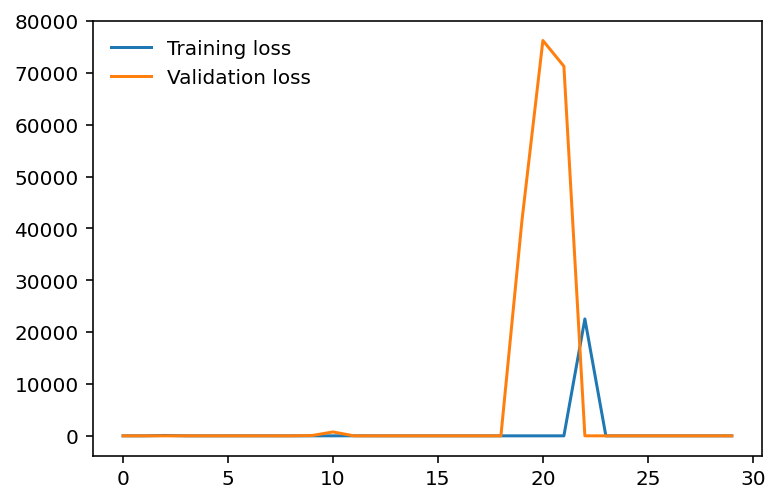

In [ ]:
plt.plot(train_losses,label='Training loss')
plt.plot(test_losses,label='Validation loss')
plt.legend(frameon=False)

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.608..  Test Loss: 0.476..  Test Accuracy: 0.831
Epoch: 2/30..  Training Loss: 0.486..  Test Loss: 0.442..  Test Accuracy: 0.834
Epoch: 3/30..  Training Loss: 0.455..  Test Loss: 0.473..  Test Accuracy: 0.832
Epoch: 4/30..  Training Loss: 0.435..  Test Loss: 0.400..  Test Accuracy: 0.858
Epoch: 5/30..  Training Loss: 0.417..  Test Loss: 0.402..  Test Accuracy: 0.854
Epoch: 6/30..  Training Loss: 0.414..  Test Loss: 0.393..  Test Accuracy: 0.860
Epoch: 7/30..  Training Loss: 0.407..  Test Loss: 0.408..  Test Accuracy: 0.856
Epoch: 8/30..  Training Loss: 0.402..  Test Loss: 0.410..  Test Accuracy: 0.853
Epoch: 9/30..  Training Loss: 0.395..  Test Loss: 0.391..  Test Accuracy: 0.860
Epoch: 10/30..  Training Loss: 0.389..  Test Loss: 0.389..  Test Accuracy: 0.864
Epoch: 11/30..  Training Loss: 0.381..  Test Loss: 0.380..  Test Accuracy: 0.867
Epoch: 12/30..  Training Loss: 0.376..  Test Loss: 0.378..  Test Accuracy: 0.869
Epoch: 13/30..  Training Loss: 0.372.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

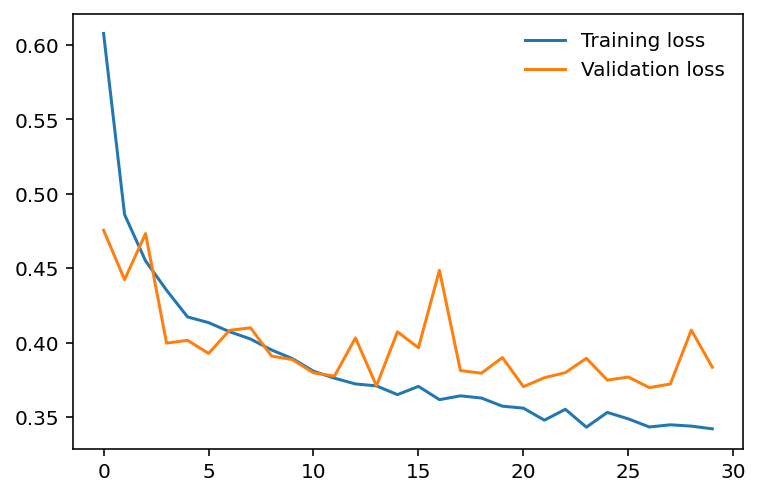

In [ ]:

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

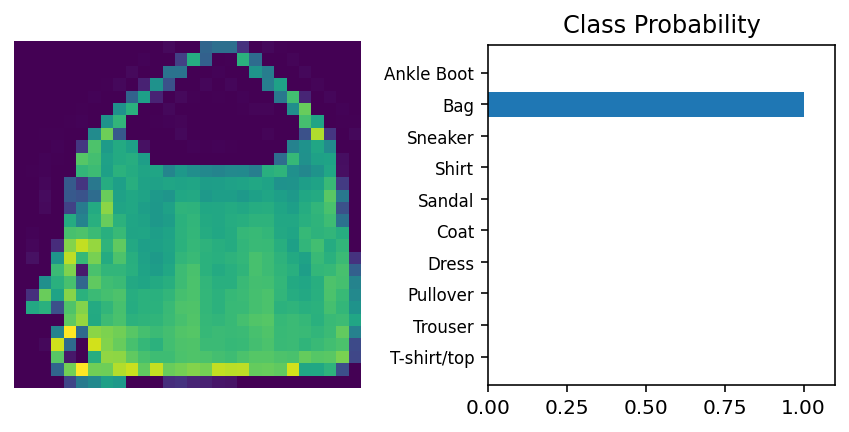

In [ ]:
#Inference
import helper

model.eval()

dataiter = iter(testloader)
images,labels = dataiter.next()
img = images[0]
#convert 2D image into 1D
img = img.view(1,784)

#calculate the class probabilities (softmax) for img
with torch.no_grad():
  output = model.forward(img)

ps = torch.exp(output)

#plot the image and probabilities
helper.view_classify(img.view(1,28,28),ps,version='Fashion')